# Resultados do experimento NLU
Giulia Chimini Stefainski, Leonardo Azzi Martins, Matheus de Moraes Costa

---

**Objetivo:** analisar os dados da avaliação do experimento NLU.

In [ ]:
%pip install -r requirements.txt

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
paper_results_dict = {
    'f1-macro': [0.774],
    'precision': [0.734],
    'recall': [0.840],
    'fpr': [0.179]
}

paper_results_df = pd.DataFrame(paper_results_dict)
paper_results_df

,f1-macro,precision,recall,fpr
0,0.774,0.734,0.84,0.179


In [3]:
bert_full_df = pd.read_csv('./covidbr_bert_metrics_kfold.csv', index_col=0)
bert_full_df['dataset'] = 'covidbr_full'
bert_full_df

,Fold,accuracy,precision,recall,f1-macro,f1-micro,fpr,dataset
0,0,0.858621,0.863498,0.858621,0.842414,0.858621,0.136502,covidbr_full
1,1,0.863793,0.866180,0.863793,0.839664,0.863793,0.133820,covidbr_full
2,2,0.850000,0.851786,0.850000,0.827120,0.850000,0.148214,covidbr_full
3,3,0.875648,0.879721,0.875648,0.859367,0.875648,0.120279,covidbr_full
4,4,0.830743,0.827362,0.830743,0.798702,0.830743,0.172638,covidbr_full


In [4]:
bert_nostarturl_df = pd.read_csv('./covidbr_nostarturl_bert_metrics_kfold.csv', index_col=0)
bert_nostarturl_df['dataset'] = 'covidbr_no_starturl'
bert_nostarturl_df

,Fold,accuracy,precision,recall,f1-macro,f1-micro,fpr,dataset
0,0,0.814815,0.813708,0.814815,0.796992,0.814815,0.186292,covidbr_no_starturl
1,1,0.823529,0.821750,0.823529,0.807088,0.823529,0.178250,covidbr_no_starturl
2,2,0.814815,0.820156,0.814815,0.809873,0.814815,0.179844,covidbr_no_starturl
3,3,0.797386,0.796774,0.797386,0.785040,0.797386,0.203226,covidbr_no_starturl
4,4,0.836245,0.840668,0.836245,0.827160,0.836245,0.159332,covidbr_no_starturl


In [5]:
bert_nourl_df = pd.read_csv('./covidbr_nourl_bert_metrics_kfold.csv', index_col=0)
bert_nourl_df['dataset'] = 'covidbr_no_url'
bert_nourl_df

,Fold,accuracy,precision,recall,f1-macro,f1-micro,fpr,dataset
0,0,0.770677,0.771457,0.770677,0.769736,0.770677,0.228543,covidbr_no_url
1,1,0.781955,0.790233,0.781955,0.781646,0.781955,0.209767,covidbr_no_url
2,2,0.800752,0.800565,0.800752,0.799251,0.800752,0.199435,covidbr_no_url
3,3,0.748120,0.748909,0.748120,0.748031,0.748120,0.251091,covidbr_no_url
4,4,0.827068,0.828085,0.827068,0.826980,0.827068,0.171915,covidbr_no_url


In [6]:
metrics_df = pd.concat([bert_full_df, bert_nostarturl_df, bert_nourl_df])
metrics_df

,Fold,accuracy,precision,recall,f1-macro,f1-micro,fpr,dataset
0,0,0.858621,0.863498,0.858621,0.842414,0.858621,0.136502,covidbr_full
1,1,0.863793,0.866180,0.863793,0.839664,0.863793,0.133820,covidbr_full
2,2,0.850000,0.851786,0.850000,0.827120,0.850000,0.148214,covidbr_full
3,3,0.875648,0.879721,0.875648,0.859367,0.875648,0.120279,covidbr_full
4,4,0.830743,0.827362,0.830743,0.798702,0.830743,0.172638,covidbr_full
0,0,0.814815,0.813708,0.814815,0.796992,0.814815,0.186292,covidbr_no_starturl
1,1,0.823529,0.821750,0.823529,0.807088,0.823529,0.178250,covidbr_no_starturl
2,2,0.814815,0.820156,0.814815,0.809873,0.814815,0.179844,covidbr_no_starturl
3,3,0.797386,0.796774,0.797386,0.785040,0.797386,0.203226,covidbr_no_starturl
4,4,0.836245,0.840668,0.836245,0.827160,0.836245,0.159332,covidbr_no_starturl


In [7]:
def letter_annotation(ax, xoffset, yoffset, letter):
 ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
         size=12)

/tmp/ipykernel_39017/1828244289.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.axhline(float(paper_results_df['f1-macro']), linewidth=0.8, color='grey', linestyle='--', label='F1-Macro em Martins et al. (2021)')
/tmp/ipykernel_39017/1828244289.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.axhline(float(paper_results_df['precision']), linewidth=0.8, color='grey', linestyle='--', label='Precisão em Martins et al. (2021)')
/tmp/ipykernel_39017/1828244289.py:87: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.axhline(float(paper_results_df['recall']), linewidth=0.8, color='grey', linestyle='--', label='Revocação em Martins et al. (2021)')


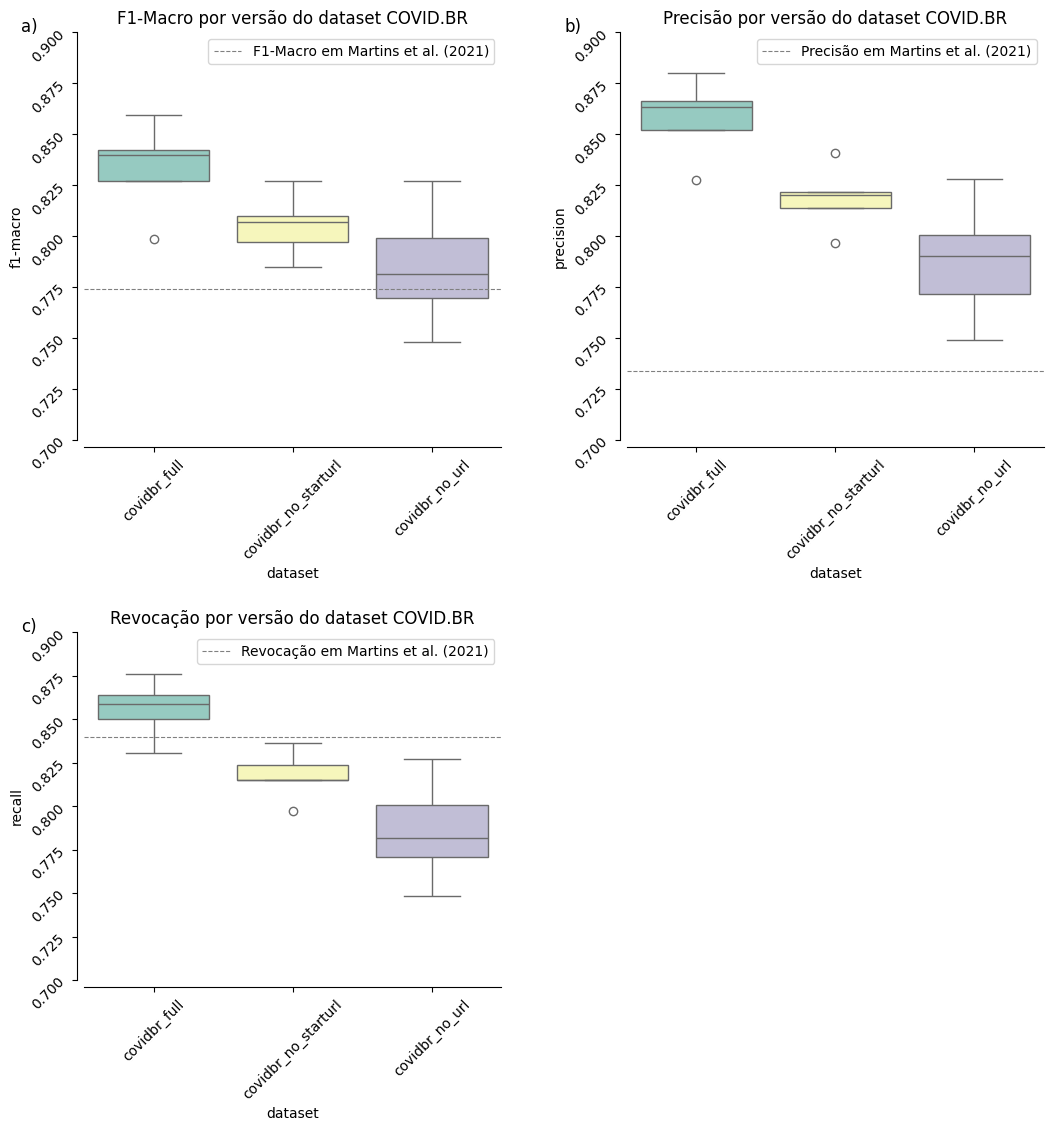

In [9]:
def letter_annotation(ax, xoffset, yoffset, letter):
 ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
                 size=12)
 
ylim = (0.7, 0.9)

fig = plt.figure(figsize=(8, 12))

# Cria 2 subfiguras para a primeira e segunda linha
(row1fig, row2fig) = fig.subfigures(2, 1, height_ratios=[1,1])

# Primeira linha
row1_axs = row1fig.subplots(1, 2)
row1fig.subplots_adjust(wspace=0.3, hspace=0.01, left=0, right=1.2, bottom=.2)

# Segunda linha
row2_axs = row2fig.subplots(1, 2)
row2fig.subplots_adjust(wspace=0.3, hspace=0.01, left=0, right=1.2, bottom=.3)

# F1-Macro
# ============================================================
ax = row1_axs[0]
sns.boxplot(data=metrics_df, x='dataset', y='f1-macro', hue='dataset', palette='Set3', ax=ax)
ax.tick_params(labelrotation=45)
ax.set_ylim(ylim)
ax.set_title('F1-Macro por versão do dataset COVID.BR')
letter_annotation(ax, -.15, 1, 'a)')
sns.despine(offset=5, trim=False, ax=ax)

# # Adiciona um ponto específico do df final_df
# ax.annotate(f"{float(paper_results_df['f1-macro']):.3f}", 
#                         xy=(0, paper_results_df['f1-macro']), 
#                         xytext=(0, paper_results_df['f1-macro']),
#                         arrowprops=dict(facecolor='black', shrink=0.09),
#                         ha='center')

ax.axhline(float(paper_results_df['f1-macro']), linewidth=0.8, color='grey', linestyle='--', label='F1-Macro em Martins et al. (2021)')

# Cria uma legenda para o desempenho no conjunto de teste
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='black', markersize=10))
# labels.append('F1-Score médio em Martins et al. (2021)')
ax.legend(handles, labels, loc='upper right')

# Precisão
# ============================================================
ax = row1_axs[1]
sns.boxplot(data=metrics_df, x='dataset', y='precision', hue='dataset', palette='Set3', ax=ax)
ax.tick_params(labelrotation=45)
ax.set_ylim(ylim)
ax.set_title('Precisão por versão do dataset COVID.BR')
letter_annotation(ax, -.15, 1, 'b)')
sns.despine(offset=5, trim=False, ax=ax)

# # Adiciona um ponto específico do df final_df
# ax.annotate(f"{float(paper_results_df['precision']):.3f}", 
#                         xy=(0, paper_results_df['precision']), 
#                         xytext=(0, paper_results_df['precision']),
#                         arrowprops=dict(facecolor='black', shrink=0.09),
#                         ha='center')

ax.axhline(float(paper_results_df['precision']), linewidth=0.8, color='grey', linestyle='--', label='Precisão em Martins et al. (2021)')

# Cria uma legenda para o desempenho no conjunto de teste
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='black', markersize=10))
# labels.append('Precisão em Martins et al. (2021)')
ax.legend(handles, labels, loc='upper right')

# Recall
# ============================================================
ax = row2_axs[0]
sns.boxplot(data=metrics_df, x='dataset', y='recall', hue='dataset', palette='Set3', ax=ax)
ax.tick_params(labelrotation=45)
ax.set_ylim(ylim)
ax.set_title('Revocação por versão do dataset COVID.BR')
letter_annotation(ax, -.15, 1, 'c)')
sns.despine(offset=5, trim=False, ax=ax)

# # Adiciona um ponto específico do df final_df
# ax.annotate(f"{float(paper_results_df['recall']):.3f}", 
#                         xy=(0, paper_results_df['recall']), 
#                         xytext=(0, paper_results_df['recall']),
#                         arrowprops=dict(facecolor='black', shrink=0.09),
#                         ha='center')

ax.axhline(float(paper_results_df['recall']), linewidth=0.8, color='grey', linestyle='--', label='Revocação em Martins et al. (2021)')

# Cria uma legenda para o desempenho no conjunto de teste
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='black', markersize=10))
# labels.append('Revocação em Martins et al. (2021)')
ax.legend(handles, labels, loc='upper right')

# ============================================================

# Deixa o segundo gráfico da segunda linha vazio
plt.delaxes(row2_axs[1])

plt.show()



/tmp/ipykernel_39017/295711239.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax.axhline(float(paper_results_df['fpr']), linewidth=0.8, color='grey', linestyle='--', label='FPR em Martins et al. (2021)')


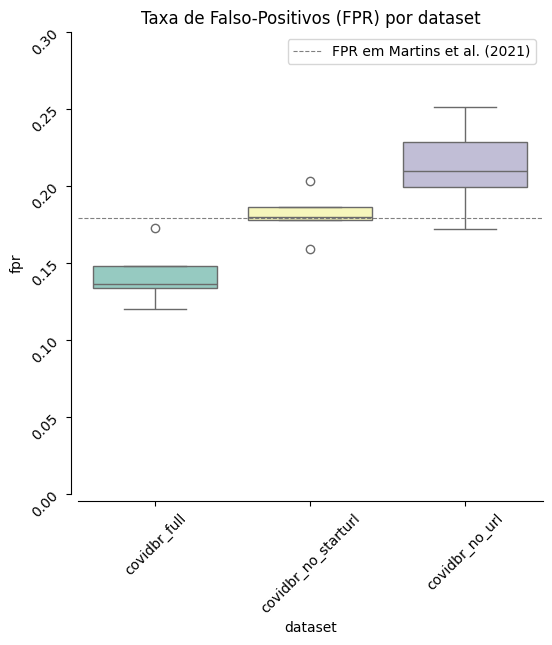

In [10]:
ylim = (0.0, 0.3)

fig = plt.figure(figsize=(6, 6))

# # Cria 2 subfiguras para a primeira e segunda linha
# (row1fig, row2fig) = fig.subfigures(2, 1, height_ratios=[1,1])

# # Primeira linha
# row1_axs = row1fig.subplots(1, 2)
# row1fig.subplots_adjust(wspace=0.3, hspace=0.01, left=0, right=1.2, bottom=.2)

# # Segunda linha
# row2_axs = row2fig.subplots(1, 2)
# row2fig.subplots_adjust(wspace=0.3, hspace=0.01, left=0, right=1.2, bottom=.3)

# False Positive Rate (FPR)
# ============================================================
ax = fig.add_subplot()
sns.boxplot(data=metrics_df, x='dataset', y='fpr', hue='dataset', palette='Set3', ax=ax)
ax.tick_params(labelrotation=45)
ax.set_ylim(ylim)
ax.set_title('Taxa de Falso-Positivos (FPR) por dataset')
# letter_annotation(ax, -.15, 1, 'a)')
sns.despine(offset=5, trim=False, ax=ax)

ax.axhline(float(paper_results_df['fpr']), linewidth=0.8, color='grey', linestyle='--', label='FPR em Martins et al. (2021)')
        
# # Cria uma legenda para o desempenho no conjunto de teste
# handles, labels = ax.get_legend_handles_labels()
# handles.append(plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='black', markersize=10))
# labels.append('FPR em Martins et al. (2021)')
ax.legend(loc='upper right')